# Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from numpy import percentile
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1- **Importing data**

In [ ]:
data = pd.read_csv("train.csv")

# 2-**EDA**

>## 2.1 Exploring the data

In [ ]:
data.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no


In [ ]:
print(f'dataset shape is {data.shape}')

dataset shape is (22500, 22)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        22500 non-null  int64  
 1   age             22500 non-null  int64  
 2   job             22500 non-null  object 
 3   marital         22500 non-null  object 
 4   education       22500 non-null  object 
 5   default         22500 non-null  object 
 6   housing         22500 non-null  object 
 7   loan            22500 non-null  object 
 8   contact         22500 non-null  object 
 9   month           22500 non-null  object 
 10  day_of_week     22500 non-null  object 
 11  duration        22500 non-null  int64  
 12  campaign        22500 non-null  int64  
 13  pdays           22500 non-null  int64  
 14  previous        22500 non-null  int64  
 15  poutcome        22500 non-null  object 
 16  emp.var.rate    22500 non-null  float64
 17  cons.price.idx  22500 non-null 

In [ ]:
data.describe()

,RecordID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,15011.876889,40.904489,1146.554311,3.857244,774.562533,1.316444,0.078529,93.538746,-39.872633,3.307811,5138.567351
std,8679.392766,12.026945,1430.790448,7.210891,326.020060,1.918733,1.573831,0.647698,5.692010,1.608627,81.748896
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,7483.750000,32.000000,144.000000,1.000000,558.750000,0.000000,-1.800000,92.969840,-43.643788,1.410000,5081.293851
50%,15032.500000,38.000000,354.000000,2.000000,999.000000,0.000000,1.100000,93.485726,-41.522404,3.964364,5165.319989
75%,22514.500000,48.000000,1877.000000,3.000000,999.000000,2.000000,1.400000,93.994000,-36.100000,4.864000,5218.069326
max,30000.000000,98.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


>## 2.2 Dealing with Nulls

NULLs exits in the dataset in the form of an attribute called unknown, so we first replace this unknowns with NULLs and then decide the best action for each attribute

In [ ]:
data.replace(to_replace = "unknown", value=np.NaN, inplace= True)

In [ ]:
data.isnull().sum()

RecordID             0
age                  0
job                274
marital            320
education          994
default           4860
housing            886
loan               889
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribe            0
dtype: int64

The number of missing values in **default** feature is very large, so we can replace null values with the category unknown again and see later if this feature is really important later on

In [ ]:
data["default"].replace(to_replace=np.NaN, value="unknown", inplace=True)

For the rest of attributes, we will replace data with the most frequent category.

In [ ]:
data["loan"].value_counts()

no     17954
yes     3657
Name: loan, dtype: int64

In [ ]:
data["loan"].replace(to_replace=np.NaN, value="no", inplace=True)

In [ ]:
data["housing"].value_counts()

yes    11568
no     10046
Name: housing, dtype: int64

In [ ]:
data["housing"].replace(to_replace=np.NaN, value="yes", inplace=True)

In [ ]:
data["education"].value_counts()

university.degree      6524
high.school            5031
basic.9y               3266
professional.course    2853
basic.4y               2322
basic.6y               1349
illiterate              161
Name: education, dtype: int64

In [ ]:
data["education"].replace(to_replace=np.NaN, value="university.degree", inplace=True)

In [ ]:
data["job"].value_counts()

admin.           5557
blue-collar      4874
technician       3530
services         2083
management       1600
retired          1006
entrepreneur      863
self-employed     836
housemaid         657
unemployed        647
student           573
Name: job, dtype: int64

In [ ]:
data["job"].replace(to_replace=np.NaN, value="admin.", inplace=True)

In [ ]:
data["marital"].value_counts()

married     13178
single       6344
divorced     2658
Name: marital, dtype: int64

In [ ]:
data["marital"].replace(to_replace=np.NaN, value="married", inplace=True)

Check if there are any remaining nulls

In [ ]:
data.isnull().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

>## 2.3 Dealing with Duplicates

In [ ]:
data.duplicated().sum()

0

There are no duplicates

>## 2.4 Some Statistics



### Is the dataset balanced?


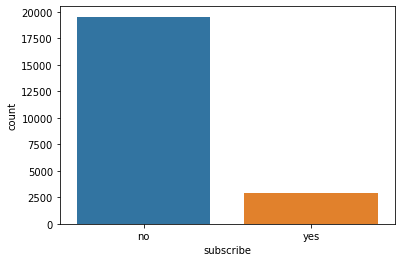

In [ ]:
sns.countplot(x='subscribe',data=data)
plt.show()

The data has so low **yes** counts compared to no

### How many people in each job category?

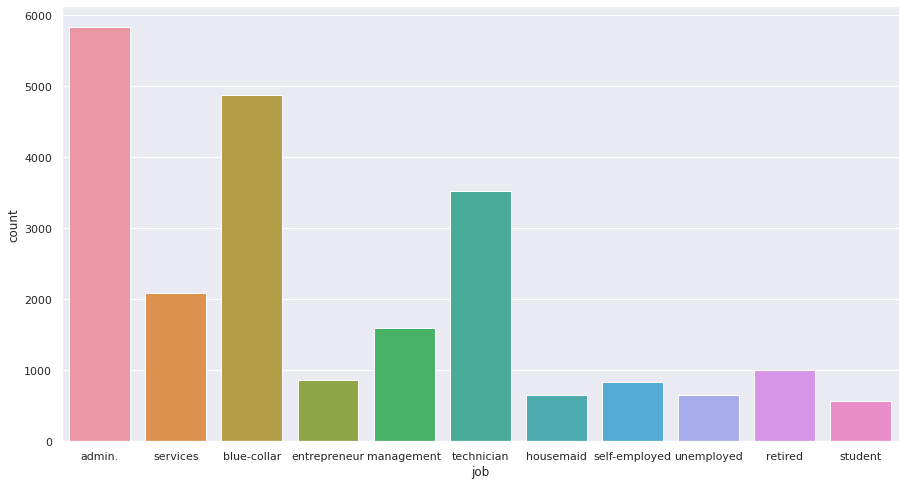

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='job',data=data)
plt.show()

The most frequent jobs are admin, blue-collar, and technician job.

### How many people in each education category?

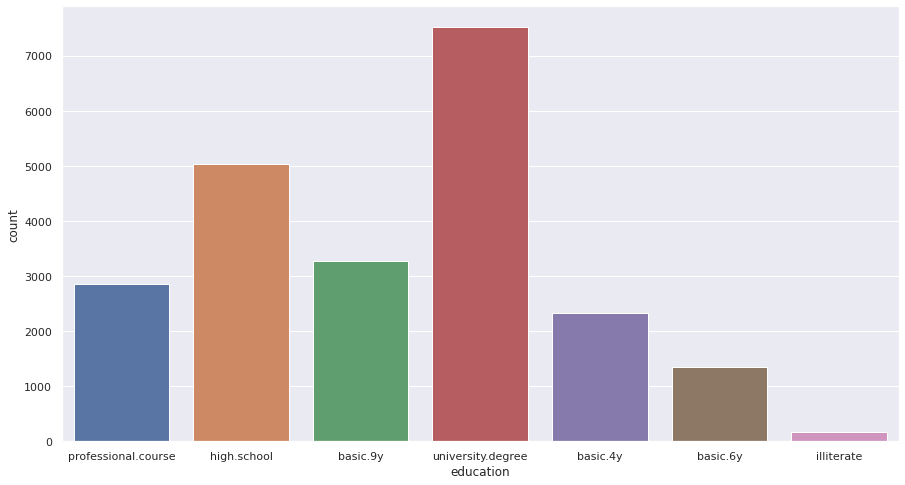

In [ ]:
sns.countplot(x='education',data=data)
plt.show()

Most people carry a university degree

### How many people in each marital category?

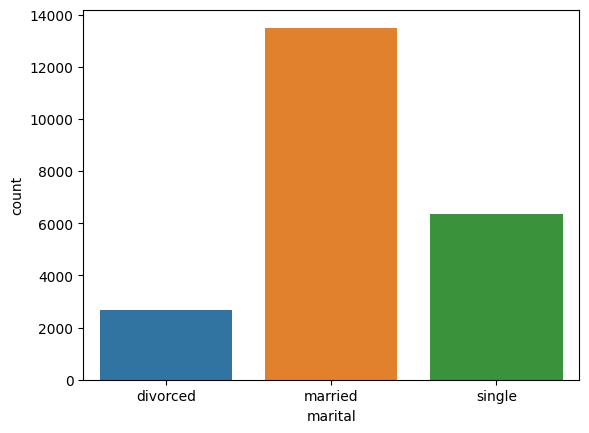

In [ ]:
sns.reset_defaults()
sns.countplot(x='marital',data=data)
plt.show()

Most of the people are married

### What is the relation between age and target?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


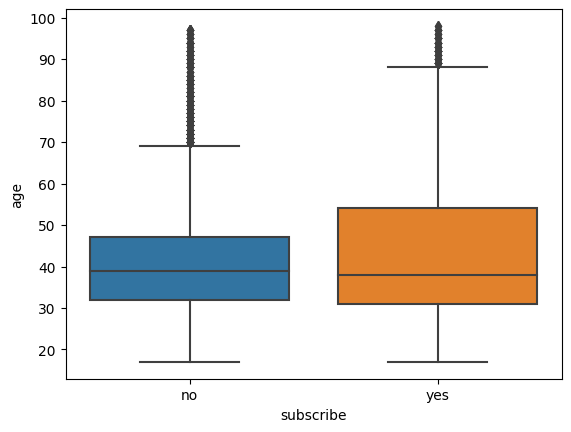

In [ ]:
sns.boxplot(data['subscribe'], data['age'])
plt.show()

The median for no and yes is nearly the same. But, older people seem to subscribe more (according to range after median in yes).

### What is the relation between duration and target?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


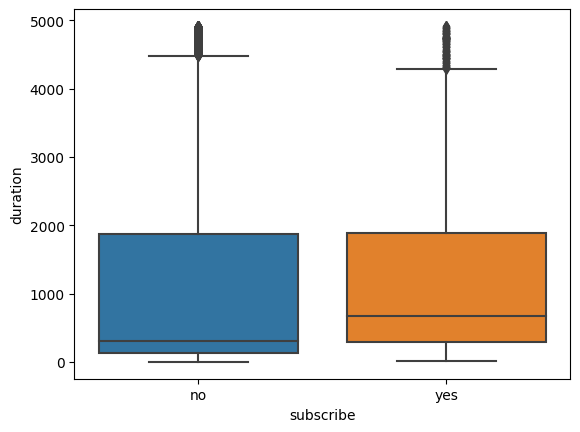

In [ ]:
sns.boxplot(data['subscribe'], data['duration'])
plt.show()

However the median in yes is more, but duration feature doesn't affect the target (subscribe). 

### How many client subscribed a term deposit per job category?

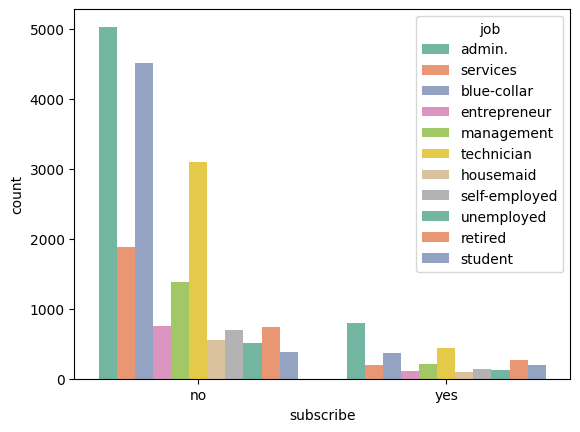

In [ ]:
sns.countplot(x='subscribe', hue='job', data=data, palette='Set2')
plt.show()

Due to the difference between **NO**s and **YES**s in the data set, it is hard to say that more people of a certain category tend to choose no or yes over the other. However, here we do notice that the relative No of **YES**s or **NO**s among jobs in the no category is almost the same for that in the yes category.

### How many client subscribed a term deposit per education category?

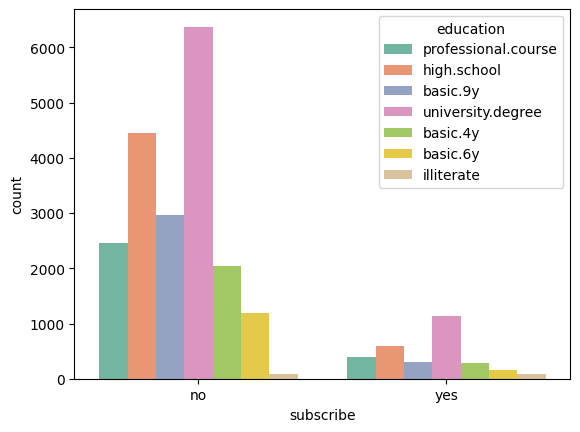

In [ ]:
sns.countplot(x='subscribe', hue='education', data=data, palette='Set2')
plt.show()

As for the feature above, relative sizes here almost stay the same.

### How many client subscribed a term deposit per marital category?

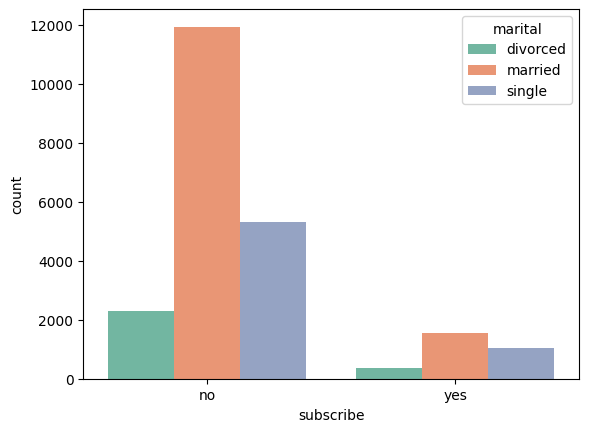

In [ ]:
sns.countplot(x='subscribe', hue='marital', data=data, palette='Set2')
plt.show()

Here we notice that the ratio of (married+no) to (single+no) is larger than ratio of (married+yes) to (single+yes)

>## 2.5 Remove Outliers 

In [ ]:
# calculate interquartile range
q25, q75 = percentile(data['duration'], 25), percentile(data['duration'], 75)
iqr = q75 - q25

In [ ]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [ ]:
# identify outliers
outliers = [x for x in data['duration'] if x < lower or x > upper]

In [ ]:
# remove outliers
data.drop(data[data['duration'] < lower].index, inplace = True)
data.drop(data[data['duration'] > upper].index, inplace = True)

>## 2.6 Encoding Target

In [ ]:
data['subscribe'].replace({"yes":1, "no":0}, inplace = True)

>## 2.7 Correlation Between Features

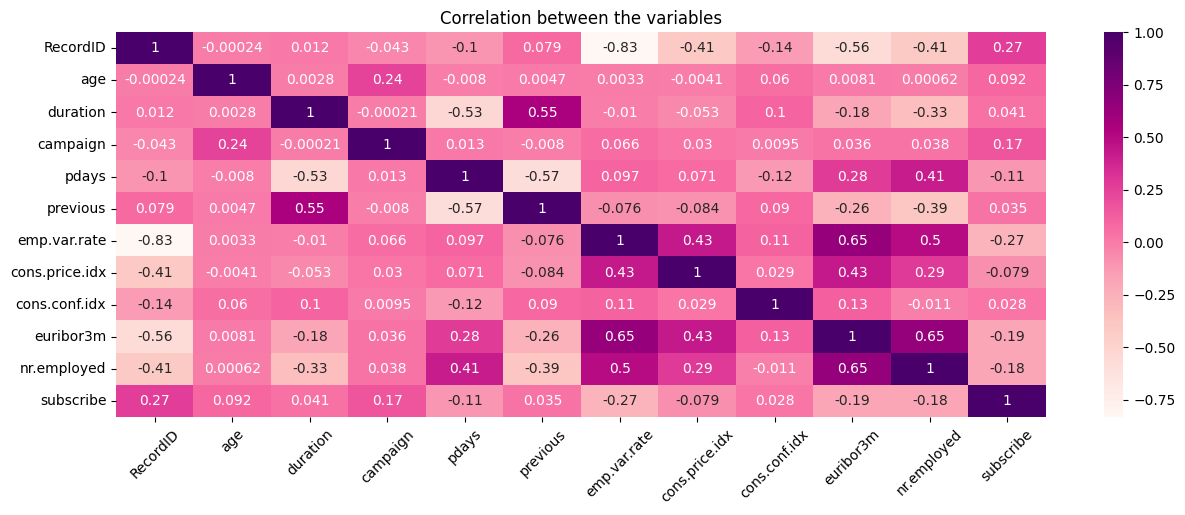

In [ ]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

Here we nontice that each feature alone do not correlate much to the target. Howver, some features provide a very low correlation (lower than 0.1). Those we assume to be not so important.

>## 2.8 Drop Irrelevant Features



In [ ]:
data.drop(['age', 'duration', 'previous', 'cons.price.idx', 'cons.conf.idx'],inplace=True,axis=1)
data.head()

,RecordID,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,euribor3m,nr.employed,subscribe
0,13783,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,1,115,failure,1.4,0.705058,4990.198481,0
2,20663,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,1,999,failure,-1.8,1.445000,5099.100000,0
3,13958,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,28,999,nonexistent,1.4,4.967000,5228.100000,1
4,28184,admin.,single,university.degree,no,no,no,cellular,nov,tue,1,252,success,-3.4,1.208702,5025.420036,0
5,10016,management,married,university.degree,no,no,no,cellular,jul,thu,1,10,nonexistent,1.4,3.461047,5133.810899,0


>## 2.9 Separating Target and Predictors



In [ ]:
y = data['subscribe']
x = data.drop(['subscribe'],axis=1)

>## 2.10 Encoding Categorical Features



Since encoding education feature should reflect the sequence, we use ordinal encoder.

In [ ]:
education_encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'illiterate':0,'basic.4y':1, 'basic.6y':2,'basic.9y':3,'high.school':4,'university.degree':5,'professional.course':6}}])

In [ ]:
x['education'] = education_encoder.fit_transform(x['education'])

We can encode housing and loan features by replacing yes and no with one and zero.

In [ ]:
x["housing"].replace({"yes":1, "no":0}, inplace = True)

In [ ]:
x["loan"].replace({"yes":1, "no":0}, inplace = True)

For the rest of the categorical features, we use one hot encoding.

In [ ]:
f_categorical = ["job", "marital","default","contact", "month", "day_of_week", "poutcome"]

In [ ]:
x_numerical = pd.get_dummies(x, columns = f_categorical, drop_first=True)

# 3-**Split Training and Testing Datasets**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_numerical, y, test_size = 0.2 , random_state = 10)

# 4-**Feature Selection**


>## KNN

In [ ]:
sfs_knn = SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=5), n_features_to_select=5 ,direction = 'forward', scoring='accuracy')
sfs_knn.fit(x_train, y_train)
sfs_knn.get_support()

array([ True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
x_train_knn=sfs_knn.transform(x_train)
x_test_knn=sfs_knn.transform(x_test)

>## Logistic Regression

In [ ]:
sfs_logre = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'liblinear', max_iter=150), n_features_to_select=5 ,direction = 'forward', scoring='accuracy')
sfs_logre.fit(x_train, y_train)
sfs_logre.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False])

In [ ]:
x_train_logre=sfs_logre.transform(x_train)
x_test_logre=sfs_logre.transform(x_test)

# 5-**Model Selection**

>## KNN

In [ ]:
K_range = list(range(1, 5)) #K neighbors to try

#grid parameters to try
param_grid = {'n_neighbors': K_range, 'p': [1,2]}
knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search_knn=grid_knn.fit(x_train_knn, y_train)

In [ ]:
#get the best parameters
print(grid_search_knn.best_params_)
print('Best Acc = ', grid_search_knn.best_score_*100)

{'n_neighbors': 4, 'p': 1}
Best Acc =  87.22543352601156


In [ ]:
#test 
y_pred = grid_search_knn.best_estimator_.predict(x_test_knn) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of KNN = {}%'.format(np.round(acc*100,2)))

Accuracy of KNN = 87.54%


>## Logistic Regression

In [ ]:
logre= LogisticRegression()
hp = {"solver":['newton-cg', 'lbfgs', 'liblinear'], 'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_logre = GridSearchCV(logre, param_grid  = hp  , cv = 5)
grid_logre.fit(x_train_logre,y_train)
print(f"Best result {grid_logre.best_params_}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Best result {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is 

In [ ]:
#test 
y_pred = grid_logre.best_estimator_.predict(x_test_logre) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of logistic regression = {}%'.format(np.round(acc*100,2)))

Accuracy of logistic regression = 87.01%


>## Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,5)}
grid_dt = GridSearchCV(clf, param_grid  = hp  , cv = 5)
grid_dt.fit(x_train,y_train)
print(f"Best result {grid_dt.best_params_}")

Best result {'criterion': 'entropy', 'max_depth': 3}


In [ ]:
#test 
y_pred = grid_dt.best_estimator_.predict(x_test) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of decision tree = {}%'.format(np.round(acc*100,2)))

Accuracy of decision tree = 87.86%


Visualize decision tree

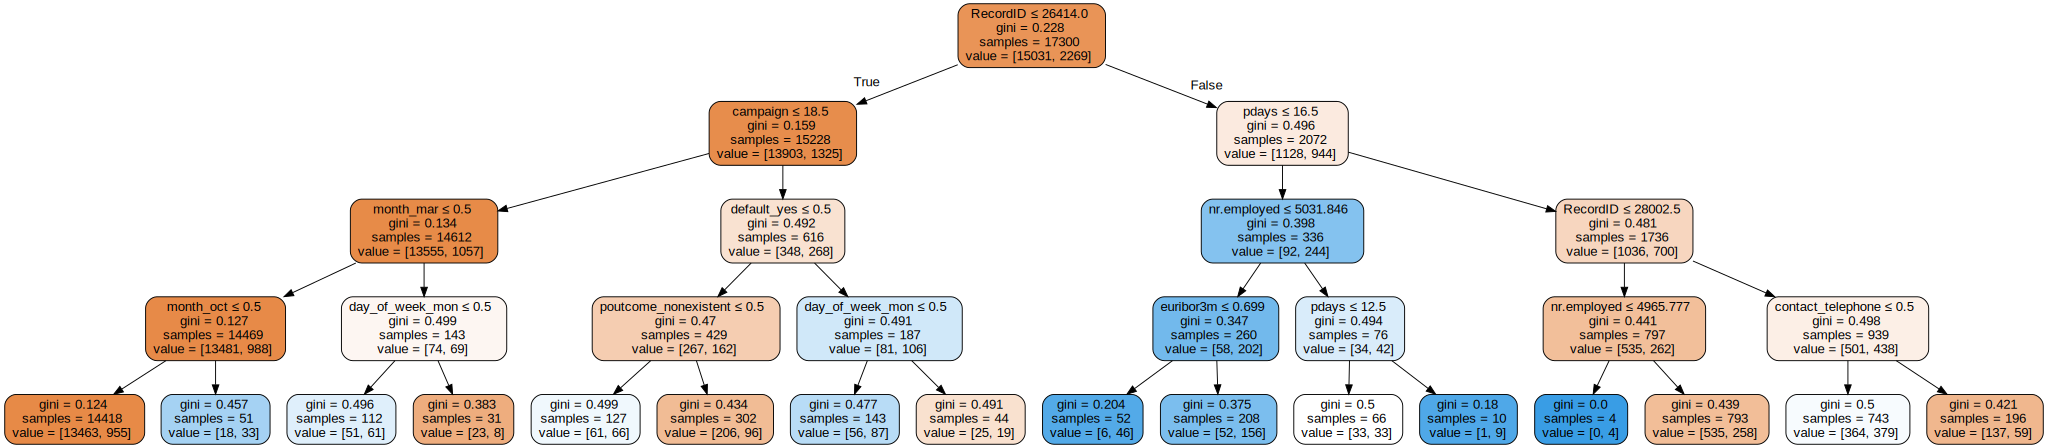

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(x_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_train.columns.values,
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

>## Random Forest

In [ ]:
rf= RandomForestClassifier(criterion= 'gini')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#test 
y_pred = rf.predict(x_test) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of Random Forest = {}%'.format(np.round(acc*100,2)))

Accuracy of Random Forest = 87.88%


# 6-**Test Data Submission**

>## 6.1 Import Test Data

In [ ]:
test = pd.read_csv("test.csv")

>## 6.2 Print Shape of Test Data

In [ ]:
test.shape

(7500, 21)

>## 6.3 Dealing with Nulls

In [ ]:
test.replace(to_replace = "unknown", value=np.NaN, inplace= True)

In [ ]:
test.isnull().sum()

RecordID             0
age                  0
job                 84
marital            131
education          336
default           1597
housing            300
loan               306
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [ ]:
test["default"].replace(to_replace=np.NaN, value="unknown", inplace=True)

In [ ]:
test["loan"].value_counts()

no     6034
yes    1160
Name: loan, dtype: int64

In [ ]:
test["loan"].replace(to_replace=np.NaN, value="no", inplace=True)

In [ ]:
test["housing"].value_counts()

yes    3881
no     3319
Name: housing, dtype: int64

In [ ]:
test["housing"].replace(to_replace=np.NaN, value="yes", inplace=True)

In [ ]:
test["education"].value_counts()

university.degree      2185
high.school            1743
basic.9y               1054
professional.course     933
basic.4y                749
basic.6y                445
illiterate               55
Name: education, dtype: int64

In [ ]:
test["education"].replace(to_replace=np.NaN, value="university.degree", inplace=True)

In [ ]:
test["job"].value_counts()

admin.           1826
blue-collar      1632
technician       1201
services          751
management        564
retired           329
entrepreneur      295
self-employed     287
unemployed        197
housemaid         191
student           143
Name: job, dtype: int64

In [ ]:
test["job"].replace(to_replace=np.NaN, value="admin.", inplace=True)

In [ ]:
test["marital"].value_counts()

married     4426
single      2073
divorced     870
Name: marital, dtype: int64

In [ ]:
test["marital"].replace(to_replace=np.NaN, value="married", inplace=True)

check if there is any remaining nulls

In [ ]:
test.isnull().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

>## 6.4 Drop Irrelevant Features

In [ ]:
test.drop(['age', 'duration', 'previous', 'cons.price.idx', 'cons.conf.idx'],inplace=True,axis=1)
test.head()

,RecordID,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,euribor3m,nr.employed
0,14664,technician,single,professional.course,no,yes,yes,cellular,aug,mon,1,471,success,1.4,3.562675,5028.544435
1,25250,admin.,single,high.school,no,yes,no,cellular,may,thu,2,159,success,-1.8,3.294182,5025.294022
2,4070,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,3,999,nonexistent,1.1,4.857000,5191.000000
3,19446,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,1,433,success,-0.1,3.318768,5111.327469
4,5111,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,2,938,success,1.1,3.833161,5183.822823


>## 6.5 Encoding Categorical Features

In [ ]:
education_encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'illiterate':0,'basic.4y':1, 'basic.6y':2,'basic.9y':3,'high.school':4,'university.degree':5,'professional.course':6}}])

In [ ]:
test['education'] = education_encoder.fit_transform(test['education'])

In [ ]:
test["housing"].replace({"yes":1, "no":0}, inplace = True)

In [ ]:
test["loan"].replace({"yes":1, "no":0}, inplace = True)

In [ ]:
f_categorical = ["job", "marital","default","contact", "month", "day_of_week", "poutcome"]

In [ ]:
test = pd.get_dummies(test, columns = f_categorical, drop_first=True)

>## 6.6 Predict Target (Subscribe)

In [ ]:
y_pred = rf.predict(test) 
test['subscribe']=y_pred
test["subscribe"].replace({1:"yes", 0:"no"}, inplace = True)
header = ["RecordID", "subscribe"]
test.to_csv('output.csv', columns = header, index=False)
test['subscribe']

0        no
1        no
2        no
3        no
4        no
       ... 
7495     no
7496     no
7497    yes
7498     no
7499     no
Name: subscribe, Length: 7500, dtype: object